````{panels}
Voraussetzungen
^^^
- keine
---

Lerninhalte
^^^
- Matlab Skripte
- If/else Abfragen
- Schleifen
- Funktionen
- Grafische Ausgaben
- Function Handles
- Scope von Variablen
- Rekursion
````

(skripte_und_funktionen)=
# Skripte und Funktionen

Bisher haben wir Befehle im `Command Window` eingeben und festgestellt, dass alle Variablen im `Workspace` hinterlegt werden. In diesem Kapitel widmen wir uns dem `Editor`. Wir benutzen ihn, um Skripte und Funktionen zu schreiben. Beide werden als Textdateien mit der Endung `.m` gespeichert. Prinzipiell können wir diese Textdateien mit jedem beliebigen Texteditor schreiben, der Editor in Matlab bietet aber einige nützliche Funktionen. Allein *Syntax-Highlighting* kann schon sehr hilfreich sein.

## Skripte
 
Matlab-Skripte sind einfache Textdateien, die eine Abfolge von Matlab-Befehlen enthalten. Diese werden nacheinander abgearbeitet. 

Das `%`-Zeichen läutet in Matlab einen Kommentar ein. Kommentare helfen dabei, die Skripte nachvollziehbar zu machen. Wie in *ALLEN* Programmiersprachen gilt auch in Matlab: **Kommentieren Sie Ihren Code!**
Es kommt nicht selten vor, dass man nach Wochen in ein altes Matlab-Skript schaut, sich fragt was man damals eigentlich gemacht hat und sich wünscht, man hätte es besser kommentiert.

In [1]:
%%file myScript.m
% Ein kleines Beispielskript
% mit Kommentaren

% Initialisiere Variablen a und b
a = 5;
b = 2*a;

% Ändere Variable a
a = a/2;

% Ausgabe erzwingen, durch Weglassen des Semikolons am Ende der Zeile
a
b

Created file '/mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/myScript.m'.


```{admonition} Hinweis 
*Die erste Zeile*

`%%file myScript.m` 

*besagt nur, dass alles was folgt, Inhalt der Datei `myScript.m` ist. Der eigentliche Inhalt der Datei beginnt ab der darauf folgenden Zeile.*

`% Ein kleines Beispielskript`.

Dieses Skript wird mit dem `run` Befehl ausgeführt.
```

In [2]:
run myScript.m

a =  2.5000
b =  10


Wir dürfen an dieser Stelle die Dateiendung `.m` weglassen. Tatsächlich ist der `run` Befehl auch nicht zwingend nötig. Die Befehle `run myScript.m`, `run myScript`, `myScript.m`, `myScript` haben alle denselben Effekt: Die Befehle in `myScript.m` werden ausgeführt.

Im Matlab-Editor kann das aktuell geöffnete Skript mit `F5` oder per Mausklick auf den großen grünen Play-Button gestartet werden.

```{image} images/matlab_run_button.png
:alt: Interacte Mode Code-Cell
:align: center
```

Es bietet sich an, in den ersten paar Zeilen jedes Skriptes zu beschreiben, welchem Zweck das Skript dient. Diese ersten Zeilen lassen sich mit dem `help`-Befehl ausgeben:

In [3]:
help myScript.m

'myScript.m' is the file /mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/myScript.m

 Ein kleines Beispielskript
 mit Kommentaren


Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


### for-Schleifen

Wie in anderen Programmiersprachen, können in Matlab auch Schleifen verwendet werden. Die Syntax für eine for-Schleife ist:

In [1]:
for i=1:5
    f(i)=2^i;
end

Der Code zwischen der `for`-  und der `end`-Zeile wird fünfmal ausgeführt. Bei jeder Ausführung wird eine *Laufvariable* `i` um Eins erhöht. Wir greifen in diesem Beispiel in jedem Durchlauf auf die $i$-te Stelle eines Vektors $f$ zu und beschreiben diese Stelle mit $2^i$. Dabei wird der Vektor f automatisch in jedem Schleifendurchlauf um ein Element erweitert. Matlab macht den Vektor nur so groß, wie für die Ausführung des Befehls nötig ist. Es ist zu beachten, dass in Matlab auf das erste Element eines Vektors mit dem Index 1 zugegriffen wird.

Es besteht die Möglichkeit die Schrittweite der Laufvariablen anzupassen. Auf diese Weise können auch Laufvariablen benutzt werden, die nicht ganzzahlig sind:

In [2]:
for t=2*pi:-pi/2:0
    x = [cos(t), sin(t)]
end

x =

   1.0000e+00  -2.4493e-16

x =

  -1.8370e-16  -1.0000e+00

x =

  -1.0000e+00   1.2246e-16

x =

   6.1232e-17   1.0000e+00

x =

   1   0



**Quiz:** Wie sieht der Vektor $f$ aus, der von folgender for-Schleife erzeugt wird?

In [6]:
clear f
for i=1:2:5
    f(i)=2^i;
end

Bei for-Schleifen ist über die Laufvariable die Anzahl der Aufrufe vor dem Beginn der Schleife klar. Es ist zwar möglich, die Laufvariable selbst in der Schleife zu verändern, das sollte aber auf jeden Fall vermieden werden. Der Code wird dadurch nicht mehr intuitiv verständlich. Es ist eine wahrscheinliche Fehlerquelle.

### while-Schleifen

while-Schleifen bieten eine weitere Möglichkeit, einen Code-Block wiederholt auszuführen. Eine while-Schleife wird solange ausgeführt, bis eine Aussage nicht mehr zutrifft. Dabei muss den Programmierer:innen vorher nicht bekannt sein, wieviele Schleifendurchläufe dafür nötig sind.

In [7]:
x = pi/2;
while abs( sin(x)-x )/x > 0.01
    x = 0.99*x;
end
disp(x)

 0.24470


Die Anweisung `x = 0.99*x` wird solange ausgeführt, bis $\frac{\lvert \sin(x) - x \rvert}{x}$ nicht mehr größer als $0.01$ ist.
Das kleine Programm schätzt auf eine etwas ungenaue Art ab, bis zu welchem Wert die Kleinwinkelnäherung $\sin(x) \approx x$ relative Fehler von unter $1 \%$ liefert. 

**Challenge:** Fallen Ihnen Wege ein, die Abschätzung genauer zu gestalten?

Eine for-Schleife kann immer in eine while-Schleife umgeschrieben werden. Folgende Code-Blöcke liefern das selbe Ergebnis:

In [8]:
for i=1:5
    f(i)=2^i;
end

In [9]:
i=1;
while i<=5
    f(i)=2^i;
    i = i+1;
end

**Best Practice:** Verwenden Sie while-Schleifen, wenn die Anzahl der Durchläufe unbekannt ist und for-Schleifen, wenn sie bekannt ist.

### if-Abfragen

Oft ist es nützlich, bestimmte Befehle nur auszuführen, wenn eine Bedingung erfüllt ist. Dies erreicht man mit if-Bedingungen.

In [10]:
zaehler = rand();
nenner = rand();
if abs(nenner) > 1e-8
    x = zaehler/nenner
end

x =  1.4199


Der Codeblock erstellt nur dann eine Variable `x`, wenn der Nenner des Bruchs größer als $10^{-8}$ ist. Wir sollten den Fall abfangen, wenn diese Bedingung mal nicht erfüllt wird. Dies erreicht man mit if-then-else-Bedingungen.

In [11]:
zaehler = rand();
nenner = rand();
if abs(nenner) > 1e-8
    x = zaehler/nenner
else
    x = 1
end

x =  0.96087


Es kann auch vorkommen, dass mehr als eine Bedingung abgefragt werden muss. In diesem Fall hilft eine if-then-else-if-else-Bedingung. Das kann zum Beispiel Sinn ergeben, wenn eine Variable eine Kategorie beschreibt, wie beispielsweise Tierarten.

In [12]:
%%file oldmcdonald.m
% make some animal noises

animal = "cow";

if strcmp(animal, "cat")
    disp("Meaow")
elseif strcmp(animal,  "dog")
    disp("Woof! Woof!")
elseif strcmp(animal,  "cow")
    disp("Moooooh!")
elseif strcmp(animal,  "kangaroo")
    disp("Gib mir eine Schnapspraline.")
else
    disp(["I don't know what kind of noise a ", animal, " makes."])
end

Created file '/mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/oldmcdonald.m'.


In [13]:
run oldmcdonald

Moooooh!


In Matlab können wir Strings nicht mit `==` auf Gleichheit prüfen. Dafür stellt Matlab die Funktion `strcmp` bereit.

Mit den bis hierher vorgestellten Werkzeugen können wir schon recht komplexe Programme schreiben. Das folgende iterative Programm sucht eine Nullstelle des Polynoms $y(x)= -x^4 + x^3 - x^2 + x + 1$ im Interval $[-1,1]$. Wir nutzen aus, dass wir wissen, dass die Funktion bei 1 positiv, und bei -1 negativ ist. Das heißt irgendwo dazwischen muss mindestens eine Nullstelle liegen.

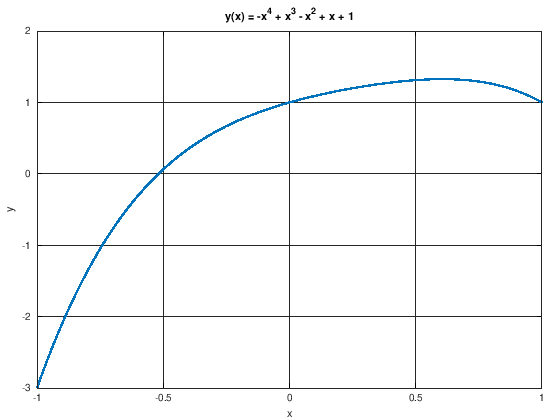

In [14]:
% plot f(x) = -x^4 + x^3 - x^2 + x + 1;
x = linspace(-1,1,100);
y = -x.^4 + x.^3 - x.^2 + x + 1;
plot(x,y, 'LineWidth',5)
set(gca,'XGrid', 'on', 'YGrid', 'on')
xlabel('x')
ylabel('y')
title('y(x) = -x^4 + x^3 - x^2 + x + 1')

Das Programm macht maximal 100 Iterationen, die über eine for-Schleife realisiert werden. In jeder Iteration wird die Größe des Intervalls um die Nullstelle mittels *Bisektion* halbiert. Über eine if-Bedingung wird untersucht, ob die gewünschte Genauigkeit erreicht wird. Wenn ja, wird die for-Schleife mit dem `break` Befehl unterbrochen.

In [15]:
%%file bisection.m
% find a zero of the polynomial 
%
%      y(x)= -x^4 + x^3 - x^2 + x + 1
%
% in the interval [-1,1] using bisection

%% input parameters:
tolerance = 1e-8;    % if the absolute value of y(x) is smaller than this, we consider
                     % the point x to be a zero.
maxIterations = 100; % maximum number of iterations
xlower = -1;         % lower bound of the interval
xupper = 1;          % upper bound of the invertal. y(xlower) and y(xupper) must have
                     % different signs!

% this variable is set to true once the iteration converged
converged = false;

for iteration=1:maxIterations
    
    % take the middle between the two bounds
    midpoint = 0.5*(xupper + xlower);
    
    % check the function value at this point
    fmidpoint = -midpoint^4 + midpoint^3 - midpoint^2 + midpoint + 1;
    
    % if the function value is small enough, we are done
    if abs(fmidpoint) < tolerance
        converged = true;
        break;
    end
    
    % if we reach this point, we have not converged. 
    
    % reset the limits and repeat
    if fmidpoint > 0
        xupper = midpoint;
    else
        xlower = midpoint;
    end
end

result = midpoint;

if converged
    disp(["Converged in ", num2str(iteration), " iterations. The solution is ", num2str(result), "."])
else
    disp(["No convergence to the specified tolerance of ", num2str(tolerance),  ...
          " within ", num2str(iteration), " iterations. The current error is ", num2str(fmidpoint), "."])
end

Created file '/mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/bisection.m'.


In [16]:
run bisection

Converged in 25 iterations. The solution is -0.51879.


### Grafische Ausgabe

Es gibt in Matlab eine Vielzahl von Methoden, um den Inhalt von Vektoren grafisch darzustellen. Die `plot` Funktion ist nützlich, um funktionale Zusammenhänge darzustellen. Sie nimmt als Eingabe zwei gleichgroße Vektoren `x` und `y`, wobei der erste die $x$-Koordinaten und der zweite die $y$-Koordinaten enthält.

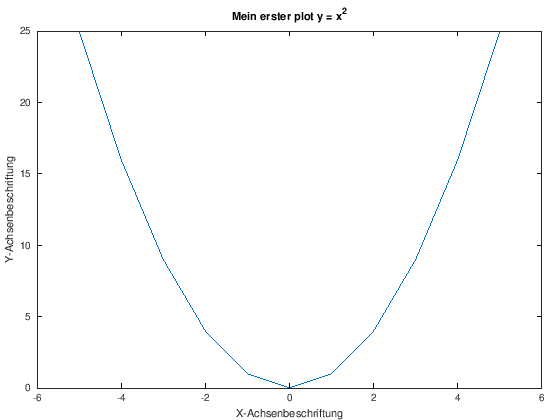

In [17]:
x = linspace(-5,5,11);   % Ein Vektor mit Werten von -5 bis 5
y = x.^2;                % Ein Vektor y mit den zugehörigen Funktionswerten 

plot(x, y);             % Erstellen einer grafischen Darstellung
title('Mein erster plot y = x^2')
xlabel('X-Achsenbeschriftung')
ylabel('Y-Achsenbeschriftung')

Über die vielen Funktionen rund um die Visualisierung und deren Optionen informieren Sie sich bitte in der Matlab Dokumentation. An dieser Stelle soll abschließend nur noch auf zwei Features aufmerksam gemacht werden:

 - Häufig möchte man mehrere Graphen in einem Koordinatensystem darstellen. Matlab überschreibt die Ergebnisse standardmäßig. Dieses Verhalten kann aber mit dem Befehl `hold on` ausgehebelt werden.
 - Das Koordinatensystem in Matlab ist ein Objekt vom Typ `axes`. Mit dem Befehl `gca`, kurz für *get current axes*, lässt sich ein *Handle* für das aktuell verwendete Koordinatensystem wiedergeben. Eigenschaften des Koordinatensystems lassen sich dann mit den Befehlen `set(gca, ...)` und `get(gca, ...)` abfragen bzw. ändern. Das ist ein nützliches Feature, wenn man tiefergreifendere Eigenschaften ändern möchte, als nur die Achsenbeschriftungen.
 
Im Folgenden werden diese beiden Features in einem Skript benutzt, das für zehn verschiedene Parameter $D \in [0.1, 1.0]$ die Funktion

$$ y(x) = \frac{1}{\sqrt{(1-x^2)^2 + (2Dx)^2}} $$

über das Interval $x \in [0, 3]$ plottet.


In [18]:
%%file resonance_catastrophe.m
% plot the resonance catastrophe curve 
%
%     y(x) = 1./sqrt((1-x.^2).^2 + (2*D*x).^2)
%
% for different damping parameters D

% x values of the plot = 500 equally spaced points in the interval [0, 3]
x = linspace(0, 3, 500);

% make sure that each new plot call does not overwrite old results
hold on

% plot 10 functions depending on a parameter D
for D = 0.1:0.1:1

    % set some variables denoting properties of the current plot
    plotname = ['D = ', num2str(D)];              % name that shall appear in the legend
    plotcolor = (1-D)*[1, 0, 0] + D*[0, 0, 1];    % RGB value that shall be used for the plot
    
    % plot the function with some additional options
    plot(x, 1./sqrt((1-x.^2).^2 + (2*D*x).^2), ...
         'DisplayName', plotname, ...
         'Color', plotcolor, ...
         'LineWidth', 5)
    
end

% set some options for the current axis
xlabel('\Omega/\omega_0', 'fontsize', 16)
ylabel('(A_\Omega*k)/F', 'fontsize', 16)
set(gca, 'Box', 'on', 'XGrid', 'on', 'YGrid', 'on')

% show a legend
legend toggle


Created file '/mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/resonance_catastrophe.m'.


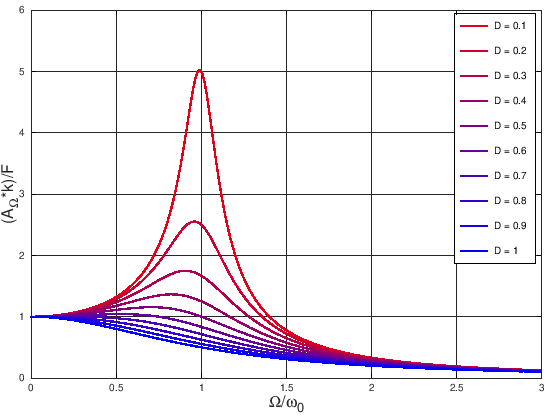

In [19]:
run resonance_catastrophe.m

## Funktionen

Mit Skripten können wir also Algorithmen als eine Abfolge von Anweisungen umsetzen. Funktionen zeichnen sich, im Gegensatz zu Skripten, dadurch aus, dass es eine klare Trennung von Eingabe, Ausgabe und Anweisungen gibt. Dies bietet sich insbesondere dann an, wenn die Funktion einen Algorithmus repräsentiert, der oft an verschiedenen Stellen ausgeführt werden soll.

### Eingabe und Ausgabe

Funktionen werden in Matlab mit dem `function` Keyword eingeleitet. Das folgende m-File `oldmcdonald.m` definiert eine Funktion mit Namen `oldmcdonald`, die für einen Tiernamen `animal` als Eingabe einen Laut `sound` als Ausgabe ausgibt. Sowohl `animal` und `sound` werden als Strings definiert.

In [20]:
%%file oldmcdonald.m
function sound = oldmcdonald(animal)
% oldmcdonald takes an input string "animal" and outputs a "noise"
% corresponding to the input. If the animal is unknown, an 
% error is thrown.
% 
% input:     animal can be any of ["cat", "dog", "cow", "kangaroo"]
% output:    noise
%
    if strcmp(animal, "cat")
        sound = "Meaow";
    elseif strcmp(animal,  "dog")
        sound = "Woof! Woof!";
    elseif strcmp(animal,  "cow")
        sound = "Moooooh!";
    elseif strcmp(animal,  "kangaroo")
        sound = "Gib mir eine Schnapspraline.";
    else
        error(["I don't know what kind of noise a ", animal, " makes."]);
    end
end

Created file '/mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/oldmcdonald.m'.


**Wichtig:** Der Dateiname muss genau dem Funktionsnamen entsprechen.

Wenn sich die Datei im aktuellen Arbeitsverzeichnis befindet, steht uns die Funktion für die Verwendung im Command Window oder in einem Skript zur Verfügung. Die Ausgabe können wir nun entweder der temporären Variable `ans` oder einer Variablen mit beliebigem Namen zuordnen:

In [21]:
oldmcdonald('cat')

ans = Meaow


In [22]:
noise = oldmcdonald('dog')

noise = Woof! Woof!


In [23]:
oldmcdonald('penguin')

error: I don't know what kind of noise a penguin makes.
error: called from
    oldmcdonald at line 18 column 9


In [24]:
help oldmcdonald

'oldmcdonald' is a function from the file /mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/oldmcdonald.m

 oldmcdonald takes an input string "animal" and outputs a "noise"
 corresponding to the input. If the animal is unknown, an 
 error is thrown.
 
 input:     animal can be any of ["cat", "dog", "cow", "kangaroo"]
 output:    noise



Additional help for built-in functions and operators is
available in the online version of the manual.  Use the command
'doc <topic>' to search the manual index.

Help and information about Octave is also available on the WWW
at http://www.octave.org and via the help@octave.org
mailing list.


Jede Funktion muss in einer Datei mit demselben Namen der Funktion definiert werden. Für kleine Funktionen, die nur in einem bestimmten Skript verwendet werden, bietet Matlab/Octave die Möglichkeit, die Funktion *am Ende des Skriptes* zu definieren:

In [1]:
%%file mylittlefarm.m
% make a bunch of noises using the oldmcdonald function from before

% define some animals
animals = {"cat", "dog", "cow", "kangaroo"};

% let each animal have his or her say
for i=1:numel(animals)
    disp(oldmcdonald(animals(i)))
end

% define the function "oldmcdonald"
function sound = oldmcdonald(animal)
    if strcmp(animal, "cat")
        sound = "Meaow";
    elseif strcmp(animal,  "dog")
        sound = "Woof! Woof!";
    elseif strcmp(animal,  "cow")
        sound = "Moooooh!";
    elseif strcmp(animal,  "kangaroo")
        sound = "Gib mir eine Schnapspraline.";
    else
        error(["I don't know what kind of noise a ", animal, " makes."]);
    end
end

Created file '/home/martin/Modellbildung-und-Simulation/content/00_einleitung/mylittlefarm.m'.


In [26]:
run mylittlefarm

Meaow
Woof! Woof!
Moooooh!
Gib mir eine Schnapspraline.


Es ist zwingend notwendig, dass alle Funktionen am Ende eines Skriptes definiert werden.

Anmerkung: Für die Liste `animals` in `mylittlefarm.m` wird keine Matrix verwendet, sondern eine sogenannte `cell`, die unterschiedlich große Variablen enthalten kann. Das erkennt man an der Verwendung der geschweiften Klammern `{}` anstelle der eckigen Klammern `[]`. Strings unterschiedlicher Länge können nicht in einer Matrix gespeichert werden, da sonst jeder Buchstabe einzeln hinterlegt wird.

### Scope von Variablen

In dem obigen Beispiel geschieht die Trennung von Eingabe, Anweisungen und Ausgabe rein syntaktisch. Tatsächlich ist die Trennung aber stärker, da Funktionen die Sichtbarkeit von Variablen einschränken. Die Sichtbarkeit einer Variable in einem Code wird mit dem englischen Begriff *Scope* bezeichnet.

Im Inneren einer Funktion sind ausschließlich die Variablen bekannt, die durch die Anweisungen im Funktionsblock erstellt wurden oder aus der Eingabe eingelesen wurden. Alle anderen Variablen, die sich zur Zeit der Ausführung im Workspace befinden, können nicht verwendet werden. Genauso sind alle Variablen, die durch Anweisungen im Funktionsblock erstellt werden, nicht im Workspace verwendbar. Auf diese Art und Weise werden keine Hilfsvariablen, die zur Lösung eines Problems innerhalb der Funktion dienen, nach außen sichtbar. Außerdem können nicht aus Versehen Variablen verwendet werden, die mit der Lösung des Problems nichts zutun haben.

Am einfachsten lässt sich das demonstrieren, indem wir das Bisektionsskript als Funktion umschreiben.

In [27]:
%%file bisection.m
function result = bisection(xlower, xupper, tolerance, maxIterations)
% find a zero of the polynomial 
%
%      y(x)= -x^4 + x^3 - x^2 + x + 1
%
% in the interval xlower and xupper using bisection
%
% input:
%   xlower:        lower bound for the zero.
%   xupper:        upper bound for the zero. y(xupper) and y(xlower) must have 
%                  different signs!
%   tolerance:     if the absolute value of y(x) is smaller than this, the point 
%                  x is considered to be a a zero.
%   maxIterations: maximum number of iterations
%
% output:
%   result:        the calculated zero of the given function

% check if the bounds have function values with different signs
fxlower =  -xlower^4 + xlower^3 - xlower^2 + xlower + 1;
fxupper =  -xupper^4 + xupper^3 - xupper^2 + xupper + 1;
if sign(fxupper) == sign(fxlower)
    error("The bounds xlower and xupper must be chosen, such that their function values have different signs.")
end

% this variable is set to true once the iteration converged
converged = false;

for iteration=1:maxIterations
    
    % take the middle between the two bounds
    midpoint = 0.5*(xupper + xlower);
    
    % check the function value at this point
    fmidpoint = -midpoint^4 + midpoint^3 - midpoint^2 + midpoint + 1;
    
    % if the function value is small enough, we are done
    if abs(fmidpoint) < tolerance
        converged = true;
        break;
    end
    
    % if we reach this point, we have not converged. 
    
    % reset the limits and repeat
    if fmidpoint > 0
        xupper = midpoint;
    else
        xlower = midpoint;
    end
end

result = midpoint;

if converged
    disp(["Converged in ", num2str(iteration), " iterations. The solution is ", num2str(result), "."])
else
    disp(["No convergence to the specified tolerance of ", num2str(tolerance),  ...
          " within ", num2str(iteration), " iterations. The current error is ", num2str(fmidpoint), "."])
end

Created file '/mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/bisection.m'.


Im Folgenden wird die neue Funktion verwendet. Die Grenzen `xlower` und `xupper` werden über die Variable `a` und `b` an die Funktion übergeben. Der Mittelpunkt des Startintervals wird in der Variable `midpoint` gespeichert.

In [28]:
% define initial points and calculate the midpoint
a = -1;
b = 1;
midpoint = (a+b)/2;

res = bisection(a, b, 1e-8, 100);

disp(midpoint)
disp(res)

Converged in 25 iterations. The solution is -0.51879.
0
-0.51879


Obwohl die Funktion ebenfalls eine Variable `midpoint` als Hilfsvariable in der Berechnung verwendet, bleibt die Variable außerhalb der Funktion unverändert. Die beiden Variablen befinden sich in unterschiedlichen *Scopes*. Aus demselben Grund kann während der Rechenvorschrift der Funktion auf keine Variablen mit dem Namen `a` oder `b` zurückgegriffen werden.

Dieses Verhalten kann mit sogenannten globalen Variablen ausgehebelt werden, wie das folgende Beispiel demonstriert.

In [2]:
%%file increment_a.m
function increment_a(n)
    global a
    a = a + n;
end

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/increment_a.m'.


In [3]:
global a
a = 0;
disp(a)
increment_a(2)
disp(a)
increment_a(5)
disp(a)

0
 2
 7


Überall dort, wo der *Scope* einer Variablen `x` erweitert werden soll, muss dies explizit durch die Zeile `global x` angegeben werden. In dem obigen Beispiel muss das also sowohl in der Funktion als auch im aufrufenden Skript geschehen.

Globale Variablen sollten spärlich verwendet werden, da sie gerade die saubere Trennung von Eingabe, Ausgabe und Funktionskörper unterwandern und so für mögliche Fehlerquellen sorgen.

### Function Handles

Neben Funktionen am Ende eines Skriptes und Funktionen in separaten m-Files, bietet Matlab die Möglichkeit Funktionen über sogenannte *Function Handles* zu definieren. Ein *Function Handle* ist eine Variable, in der die Funktion gespeichert wird. Function Handles eignen sich besonders, um kurze einzeilige Funktionen zu definieren.

In [49]:
myPolynomial = @(x) -x.^4 + x.^3 - x.^2 + x + 1;

In [33]:
class(myPolynomial)

ans = function_handle


In [34]:
myPolynomial(-1)

ans = -3


In [35]:
myPolynomial(1)

ans =  1


Mit einem vorangestellten `@(x)` wird deklariert, dass `x` als Eingabeparameter für die Funktion interpretiert werden soll. Hier kann man auch eine Abhängigkeit von mehreren Variablen deklarieren, z.B.

In [5]:
norm2d = @(x,y) sqrt(x.^2 + y.^2);
norm2d(1,1)

ans =  1.4142


Da die Funktion nun als Variable im Workspace gespeichert ist, können wir sie wie andere Variablen verwenden. Wir können sie auch als Eingabe an eine weitere Funktion übergeben. So könnten wir zum Beispiel die Bisektionsfunktion so anpassen, dass sie als Eingabe eine beliebige Funktion in Form eines Function Handles erhält. Dadurch können wir mit unserer Funktion Nullstellen beliebiger Funktionen finden. Die einzige Voraussetzung ist, dass wir die Nullstelle durch ein Intervall sinnvoll eingeklammert haben und sich der Function Handle für alle Zwischenwerte auswerten lässt.

In [7]:
%%file bisection.m
function result = bisection(f, xlower, xupper, tolerance, maxIterations)
% bisection finds a zero of a function f in the interval xlower and xupper 
% using bisection
%
% input:
%   f:             a function handle to the function f
%   xlower:        lower bound for the zero.
%   xupper:        upper bound for the zero. y(xupper) and y(xlower) must have 
%                  different signs!
%   tolerance:     if the absolute value of y(x) is smaller than this, the point 
%                  x is considered to be a a zero.
%   maxIterations: maximum number of iterations
%
% output:
%   result:        the calculated zero of the given function

% check if the bounds have function values with different signs
if sign(f(xupper)) == sign(f(xlower))
    error("The bounds xlower and xupper must be chosen, such that their function values have different signs.")
end

% this variable is set to true once the iteration converged
converged = false;

for iteration=1:maxIterations
    
    % take the middle between the two bounds
    midpoint = 0.5*(xupper + xlower);
    
    % check the function value at this point
    fmidpoint = f(midpoint);
    
    % if the function value is small enough, we are done
    if abs(fmidpoint) < tolerance
        converged = true;
        break;
    end
    
    % if we reach this point, we have not converged. 
    
    % reset the limits and repeat
    if fmidpoint > 0
        xupper = midpoint;
    else
        xlower = midpoint;
    end
end

result = midpoint;

if converged
    disp(["Converged in ", num2str(iteration), " iterations. The solution is ", num2str(result), "."])
else
    disp(["No convergence to the specified tolerance of ", num2str(tolerance),  ...
          " within ", num2str(iteration), " iterations. The current error is ", num2str(fmidpoint), "."])
end

Created file '/home/jan/shares/Modellbildung-und-Simulation/content/00_einleitung/bisection.m'.


Nicht nur haben wir die Funktion stark erweitert, da sie nun Nullstellen beliebiger Funktionen finden kann, wir haben auch eine potentielle Fehlerquelle beseitigt: Bisher wurde die Funktionsvorschrift des Polynoms an drei Stellen des Algorithmus verwendet. Wenn die Funktion nun geändert werden soll, passiert es schnell, dass sie nicht an allen Stellen geändert wird. In der neuen Version kann das nicht passieren, da überall die Funktion `f` aus der Eingabe verwendet wird.

Die weiter oben über ein Function Handle definierte Funktion `myPolynomial` kann nun als Eingabe verwendet werden:

In [52]:
bisection(myPolynomial, -1, 1, 1e-12, 100)

Converged in 40 iterations. The solution is -0.51879.
ans = -0.51879


**Quiz**: Finden Sie die erste positive Nullstelle der Funktion $f(x)=-\cos(-\frac{1}{3}x^2 - \frac{1}{10}x + 1)$. 

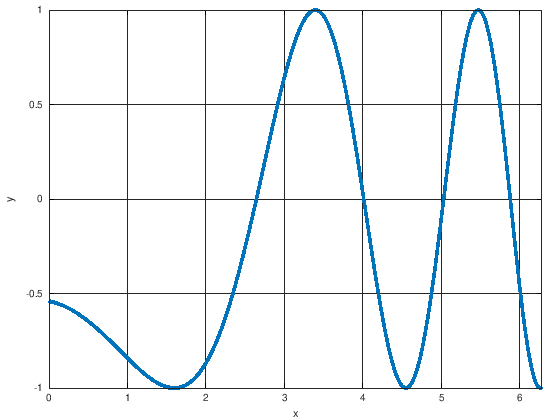

In [45]:
%plot f(x)= -cos(-0.33*x.^2-0.1*x +1)
x = 0:pi/2000:2*pi;
plot(x,-cos(-0.33*x.^2-0.1*x +1),'LineWidth',10)
xlabel('x')
ylabel('y')
xlim([0,2*pi])
set(gca, 'Box', 'on', 'XGrid', 'on', 'YGrid', 'on')

In [39]:
% space for quiz answer


Aus Funktionen, die über ein m-File definiert wurden, lassen sich auch Function Handles erzeugen.

Function Handles lassen sich durch ein vorangestelltes `@` vor dem Funktionsnamen erzeugen. Im folgenden Beispiel wird ein Function Handle `h` für die Funktion `bisection` erstellt. Die Funktion `bisection` wird anschließend mittelbar über das Function Handle `h` aufgerufen, um eine Nullstelle der Funktion $f(x) = 2x - \frac{1}{3}$ aufzufinden.

In [8]:
h = @bisection
class(h)
h(@(x) 2*x-0.33, 0, 1, 1e-8, 100)

h = @bisection
ans = function_handle
Converged in 27 iterations. The solution is 0.165.
ans =  0.16500


### Rekursion

Zum Schluss sei noch angemerkt, dass Funktionen sich selbst aufrufen können. In vielen Fällen, in denen sich diese *Rekursion* anwenden lässt, sorgt ein rekursiver Aufruf für eine sehr kurze, prägnante Schreibweise. So lässt sich die Fakultät wieder über eine Auswertung der Fakuktät definieren:

$$ n! = n \cdot (n-1)! $$

für alle $n \in \mathbb{N}$ und $0! = 1$.

Als weiteres Beispiel für eine Rekursion sei die ursprüngliche Fibonacci-Folge angegeben. Die ersten beiden Zahlen der Fibonacci-Folge $a_n$ sind $a_1 = 1, a_2 = 1$. Alle weiteren Zahlen ergeben sich aus der Summe der beiden vorherigen:

$$ a_{n} = a_{n-1} + a_{n-2}.$$

Die ersten paar Zahlen der Fibonacci-Folge sind demnach:

$$1,1,2,3,5,8,13,...$$

Das folgende Programm berechnet die $n$-te Fibonacci-Zahl:

In [41]:
%%file fibonacci.m
function out = fibonacci(n)
    if (n<3)
        out = 1;
    else
        out = fibonacci(n-1) + fibonacci(n-2);
    end;
end

Created file '/mnt/d/documents/modellbildung-und-simulation/content/00_einleitung/fibonacci.m'.


In [42]:
fibonacci(15)

ans =  610


Die if-then-else-Anweisung garantiert, dass die Rekursion terminiert, da die Funktion im Funktionskörper immer nur für kleinere Zahlen aufgerufen wird.

**Zusatzfrage:** Wie ist der Algorithmus hinsichtlich der verwendeten Rechenoperationen zu bewerten? Ist er effizient implementiert oder lässt sich da etwas verbessern?